# Comparision Between Countries

### Load and Inspect data

In [1]:
# Load clean data for each country
import sys
import os


sys.path.append(os.path.abspath("../src"))
from data_loader import load_csv

benin_df = load_csv("../data/benin-malanville_clean.csv")
sierraleone_df = load_csv("../data/sierraleone-bumbuna_clean.csv")
togo_df = load_csv("../data/togo-dapaong_qc_clean.csv")

benin_df.shape, sierraleone_df.shape, togo_df.shape

2025-05-20 11:51:21,386 - INFO - Successfully loaded data from ../data/benin-malanville_clean.csv with shape (246871, 18)
2025-05-20 11:51:22,293 - INFO - Successfully loaded data from ../data/sierraleone-bumbuna_clean.csv with shape (238866, 18)
2025-05-20 11:51:23,315 - INFO - Successfully loaded data from ../data/togo-dapaong_qc_clean.csv with shape (267553, 18)


((246871, 18), (238866, 18), (267553, 18))

In [2]:
# Change Timestamp to datetime
import pandas as pd

for df in [benin_df, sierraleone_df, togo_df]:
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])

### Metric Comparision

In [3]:
# Use ComparisionUtils to combine the data
from country_comparision_utils import ComparisionUtils

comparator = ComparisionUtils()
combined_df = comparator.combine_country_data({"Benin": benin_df, "Sierra Leone": sierraleone_df, "Togo": togo_df})
combined_df.head()


2025-05-20 11:51:26,171 - INFO - Comparsion Utility Class Initialized.
2025-05-20 11:51:26,211 - INFO - All data is valid.
2025-05-20 11:51:26,267 - INFO - Data combined successfully.


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,country
0,2021-08-09 06:54:00,16.7,0.0,16.5,16.1,16.3,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.2,23.7,Benin
1,2021-08-09 06:55:00,18.2,0.1,18.0,17.4,17.6,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.8,Benin
2,2021-08-09 06:56:00,19.7,0.3,19.5,18.7,18.9,24.2,98.8,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.3,23.9,Benin
3,2021-08-09 06:57:00,21.1,0.6,20.9,19.9,20.1,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.4,23.9,Benin
4,2021-08-09 06:58:00,22.5,1.1,22.2,21.1,21.3,24.2,98.9,0.0,0.0,0.0,0.0,0.0,997,0,0.0,24.5,24.0,Benin


In [4]:
combined_df.shape

(753290, 19)

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753290 entries, 0 to 753289
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      753290 non-null  datetime64[ns]
 1   GHI            753290 non-null  float64       
 2   DNI            753290 non-null  float64       
 3   DHI            753290 non-null  float64       
 4   ModA           753290 non-null  float64       
 5   ModB           753290 non-null  float64       
 6   Tamb           753290 non-null  float64       
 7   RH             753290 non-null  float64       
 8   WS             753290 non-null  float64       
 9   WSgust         753290 non-null  float64       
 10  WSstdev        753290 non-null  float64       
 11  WD             753290 non-null  float64       
 12  WDstdev        753290 non-null  float64       
 13  BP             753290 non-null  int64         
 14  Cleaning       753290 non-null  int64         
 15  

#### Note

- Inspection reveals that data is combined successfully

2025-05-20 11:51:27,444 - INFO - PlotGenerator initialized successfully.
2025-05-20 11:51:31,774 - INFO - Grouped boxplot for GHI created successfully.
2025-05-20 11:51:34,946 - INFO - Grouped boxplot for DNI created successfully.
2025-05-20 11:51:37,966 - INFO - Grouped boxplot for DHI created successfully.


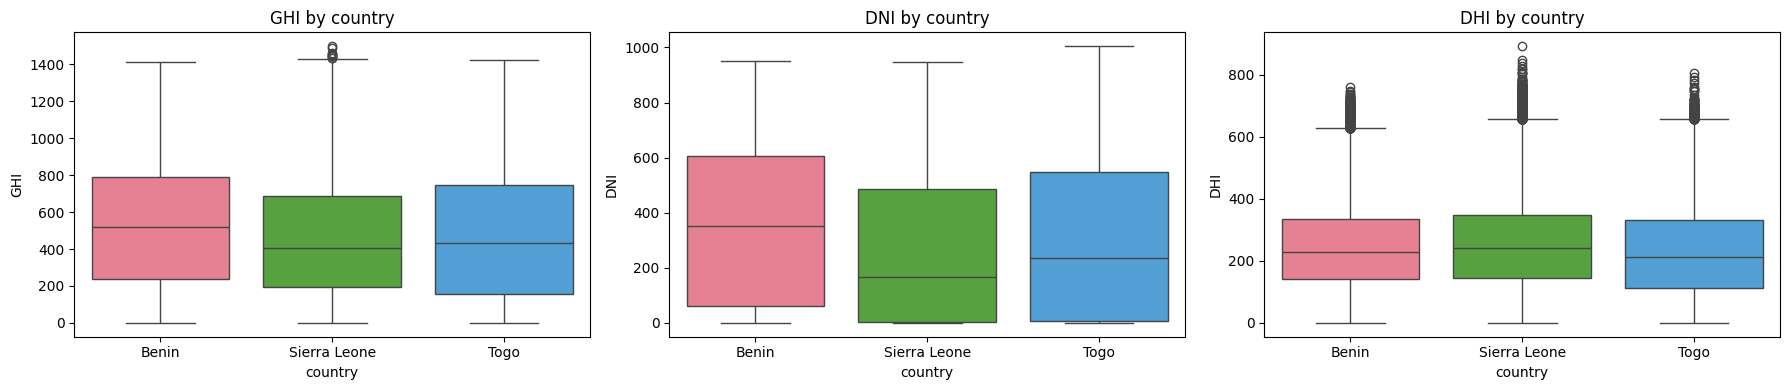

In [6]:
# Plot box plots using combined data and PlotGenerator

from plot_generator import PlotGenerator

plot_gen = PlotGenerator()
plot_gen.plot_box_grouped(df=combined_df, columns=["GHI", "DNI", "DHI"], group_column="country", color=True)

#### Note

##### Solar Irradiance Comparison by Country (Initial Assessment):

- **GHI**: **Benin** shows **the highest median GHI**, followed by **Togo**, with **Sierra Leone** exhibiting the **lowest median GHI**. This suggests **Benin receives the most total solar energy on a horizontal surface, on average**.

- **DNI**: **Benin** also leads with the **highest median DNI**, indicating more intense, direct sunlight. **Togo** is **second**, while **Sierra Leone** has a significantly **lower median DNI**, suggesting less direct beam radiation, possibly due to more frequent cloud cover or atmospheric haze.

- **DHI**: **Sierra Leone** has the **highest median DHI**, followed by **Benin** and then **Togo**, which has slightly **lower DHI**. A higher proportion of DHI (especially when DNI is low) can indicate more overcast or scattered light conditions.

##### Initial Assumption

- Potentially Better: Based purely on these irradiance plots, Benin appears to be the most favorable location for solar panel installation. It consistently shows higher GHI and, crucially for many technologies, higher DNI, suggesting greater overall solar energy yield potential.

- Potentially Worse: Sierra Leone appears to be the least favorable. It has the lowest GHI and DNI, coupled with the highest DHI, which might imply more frequent obstructions to direct sunlight (e.g., cloudiness), leading to lower energy generation.

- Togo ranks as intermediate between Benin and Sierra Leone.

In [7]:
comparator.generate_summary_stats(combined_df)

2025-05-20 11:51:38,387 - INFO - Generating summary stats for metrics: ['GHI', 'DNI', 'DHI'] using aggregations: ['mean', 'median', 'std']
2025-05-20 11:51:38,631 - INFO - Successfully generated summary stats


,country,GHI_mean,GHI_median,GHI_std,DNI_mean,DNI_median,DNI_std,DHI_mean,DHI_median,DHI_std
0,Benin,513.43,520.4,304.76,356.49,352.3,279.73,247.40,227.8,143.42
1,Sierra Leone,445.48,406.1,294.38,256.40,166.4,263.17,251.61,242.4,141.63
2,Togo,455.20,431.7,318.69,297.14,235.3,283.50,228.73,211.9,149.82


#### Note

- Summary table supports the box plot and shows that **Benin** exhibit relatively higher **GHI** and **DNI** measurements, where **Togo** comes second and **Sierra Leone** exhibits the lowest of these measurements. regarding **DHI** just like the box plot **Sierra Leone** shows the highest measurements which highly suggests sun light obstruction due to cloudy or foggy climate.

### Statistical Testing

In [8]:
# Perform ANOVA test
f_stat, p_value = comparator.perform_anova(df=combined_df, group_col='country', value_col='GHI', interpret=True)
print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.5f}")

2025-05-20 11:51:40,820 - INFO - ANOVA test performed on 'GHI' grouped by 'country'.


Significant differences detected in 'GHI' between groups in 'country'.
F-statistic: 3546.187, p-value: 0.00000


#### Note

- ANOVA testing shows a statistically significant difference in GHI across countries (p < 0.001). This suggests that GHI averages vary meaningfully between at least some of the countries studied.
- Very high F-statistic: Indicates the variance between the group means is much larger than the variance within each group.

**There is strong statistical evidence that the average GHI values differ significantly between at least one pair of countries.**

### Bar Chart

/home/miki/Desktop/KIFIYA/week0/src/country_comparision_utils.py:149: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_ghi.index, y=avg_ghi.values, palette='viridis')


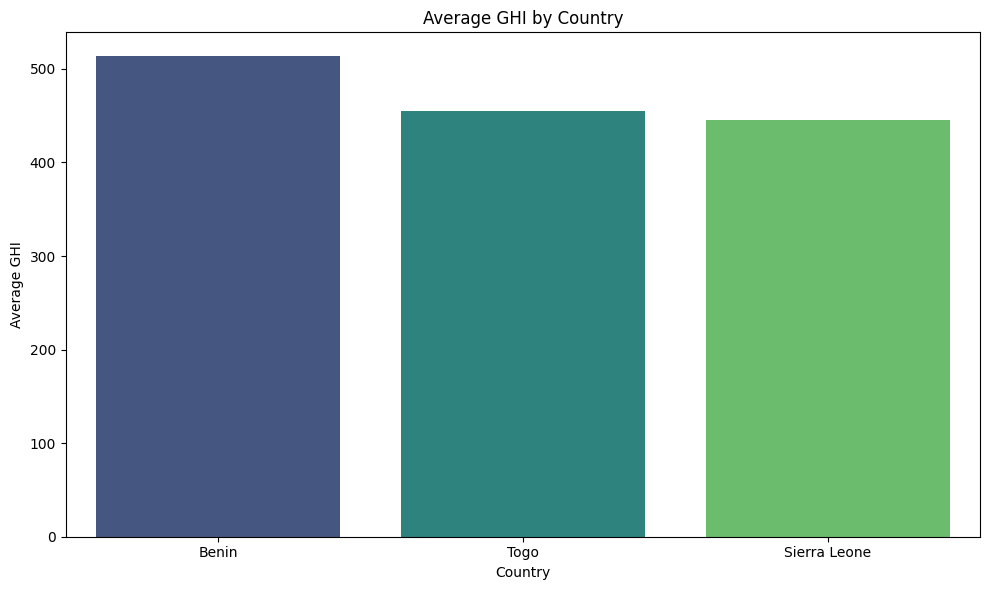

2025-05-20 11:51:42,192 - INFO - Average GHI bar chart created successfully.


In [9]:
# plot a small bar chart
comparator.plot_avg_value_by_country(df=combined_df, country_col='country', value_col='GHI')

#### Note

- The statistical testing (ANOVA testing) performed confirms **there is a difference between average mean values of GHI b/n countries** and this bar chart demonestrates that difference. so **final recomendation should be Benin - Malanville**.